In [2]:
import pandas as pd
import numpy as np

In [3]:
## need to add instructions for anything i do manually

In [4]:
rename_map = {"Country name": "Country",
              "country": "Country",
              "Ladder score": "Happiness score",
              "upperwhisker": "Whisker-high",
              "lowerwhisker": "Whisker-low"
}

keep = ["Country", "Regional indicator", "Year", "Happiness score", "Whisker-high", "Whisker-low", "Explained by: GDP per capita",
        "Explained by: Log GDP per capita",  "Explained by: Social support", "Explained by: Health life expectancy",
        "Explained by: Freedom to make life choices", "Explained by: Generosity", "Explained by: Perceptions of corruption"]

dfs = {}
for i in range(15, 25):
    dfs[i] = pd.read_csv(f"./data/WHR{i}.csv")

for i in dfs.keys():
    dfs[i]["Year"] = pd.to_datetime(2000+i, format="%Y") #2000+i
    dfs[i].rename(rename_map, axis=1, inplace=True)    
    dfs[i] = dfs[i][[x for x in keep if x in dfs[i].columns]]

df = pd.concat(dfs.values())

In [5]:
## DATA CLEANING ##

rename_countries1 = {}
[rename_countries1.update({i: i[:-1]}) for i in sorted(df["Country"].value_counts().index.values) if "*" in i];

rename_countries2 = { ## found by manual analysis of the data
    "Czech Republic": "Czechia",
    "Hong Kong S.A.R. of China": "Hong Kong",
    "Hong Kong SAR, China": "Hong Kong",
    "North Cyprus": "Northern Cyprus",
    "Palestinian Territories": "State of Palestine", ## used in 2025
    "Taiwan Province of China": "Taiwan",
    "Trinidad & Tobago": "Trinidad and Tobago",
    "Turkey": "Turkiye",
    "Eswatini": "Swaziland/Eswatini", ## not fully sure what to do with these three
    "Eswatini, Kingdom of": "Swaziland/Eswatini", 
    "Swaziland": "Swaziland/Eswatini"
}

df = df[df["Country"] != "xx"] ## remove empty row
df["Country"] = df["Country"].replace(rename_countries1)
df["Country"] = df["Country"].replace(rename_countries2)


In [6]:
df.head()

,Country,Regional indicator,Year,Happiness score,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Whisker-high,Whisker-low,Explained by: GDP per capita
0,Switzerland,Western Europe,2015-01-01,7.587,1.396505,1.349505,0.665573,0.296775,0.419777,NaN,NaN,NaN
1,Iceland,Western Europe,2015-01-01,7.561,1.302324,1.402231,0.628772,0.436297,0.141451,NaN,NaN,NaN
2,Denmark,Western Europe,2015-01-01,7.527,1.325478,1.360581,0.649384,0.341386,0.483573,NaN,NaN,NaN
3,Norway,Western Europe,2015-01-01,7.522,1.458997,1.330955,0.669732,0.346989,0.365034,NaN,NaN,NaN
4,Canada,North America and ANZ,2015-01-01,7.427,1.326292,1.322608,0.632968,0.458109,0.329573,NaN,NaN,NaN


In [7]:
#[print(i) for i in sorted(df["Country"].value_counts().index.values)]

In [8]:
## DEALING WITH THE CONGO

# Congo / Congo (Brazzaville) / Congo (Kinshasa)
df.loc[df["Country"].isin([i for i in sorted(df["Country"].value_counts().index.values) if "Congo" in i])]

,Country,Regional indicator,Year,Happiness score,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Whisker-high,Whisker-low,Explained by: GDP per capita
119,Congo (Kinshasa),Sub-Saharan Africa,2015-01-01,4.5170,0.000000,1.001195,0.226054,0.248336,0.076245,NaN,NaN,NaN
138,Congo (Brazzaville),Sub-Saharan Africa,2015-01-01,3.9890,0.678661,0.662895,0.414661,0.123883,0.116855,NaN,NaN,NaN
124,Congo (Kinshasa),NaN,2016-01-01,4.2720,NaN,0.806765,0.156017,0.254578,0.060749,4.353000,4.191000,0.056606
126,Congo (Brazzaville),NaN,2016-01-01,4.2360,NaN,0.477987,0.379377,0.120771,0.097529,4.365000,4.107000,0.771093
123,Congo (Brazzaville),NaN,2017-01-01,4.2910,NaN,0.832000,0.435000,0.121000,0.080000,4.410000,4.172000,0.809000
125,Congo (Kinshasa),NaN,2017-01-01,4.2800,NaN,1.229000,0.236000,0.246000,0.060000,4.358000,4.202000,0.092000
113,Congo (Brazzaville),NaN,2018-01-01,4.5590,NaN,0.811000,0.514000,0.091000,0.077000,4.688000,4.430000,0.682000
131,Congo (Kinshasa),NaN,2018-01-01,4.2450,NaN,1.136000,0.312000,0.197000,0.052000,4.341000,4.149000,0.069000
102,Congo (Brazzaville),NaN,2019-01-01,4.8120,NaN,0.799000,0.372000,0.105000,0.093000,4.955000,4.668000,0.673000
126,Congo (Kinshasa),NaN,2019-01-01,4.4180,NaN,1.125000,0.269000,0.212000,0.053000,4.543000,4.293000,0.094000


---

In [60]:
df_global = pd.read_csv("data/Global Economy Indicators.csv")
df_global.columns = df_global.columns.str.strip()
for i in df_global.columns:
    if df_global[i].dtype == object:
        df_global[i] = df_global[i].str.strip()
df_global["Year"] = pd.to_datetime(df_global["Year"], format="%Y")

df2 = df_global[df_global["Year"] >= pd.to_datetime(2015, format="%Y")]
df2.head()

,CountryID,Country,Year,AMA exchange rate,IMF based exchange rate,Population,Currency,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Changes in inventories,...,Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP)
45,4,Afghanistan,2015-01-01,61.143462,61.143462,33753499,Afghani,559,4.777856e+09,NaN,...,1.497766e+10,6.209330e+09,7.442523e+08,1.211308e+09,6.968190e+09,1.752209e+10,1.899054e+09,1.986447e+09,1.888222e+10,1.871305e+10
46,4,Afghanistan,2016-01-01,67.866086,67.866086,34636207,Afghani,525,4.638291e+09,NaN,...,1.444640e+10,5.841752e+09,7.413601e+08,1.296204e+09,7.073713e+09,1.716008e+10,1.583227e+09,1.978781e+09,1.819913e+10,1.801956e+10
47,4,Afghanistan,2017-01-01,68.026904,68.026904,35643418,Afghani,537,4.992454e+09,NaN,...,1.391303e+10,6.029924e+09,6.671211e+08,1.304544e+09,7.199680e+09,1.791394e+10,1.574009e+09,2.248362e+09,1.914502e+10,1.889635e+10
48,4,Afghanistan,2018-01-01,72.083247,72.083247,36686784,Afghani,507,4.060048e+09,NaN,...,1.630358e+10,7.400610e+09,1.134634e+09,1.802054e+09,7.232891e+09,1.748088e+10,1.601011e+09,2.121150e+09,1.861026e+10,1.841885e+10
49,4,Afghanistan,2019-01-01,77.737949,77.737949,37769499,Afghani,508,4.872438e+09,NaN,...,1.807539e+10,8.251464e+09,1.331477e+09,2.073301e+09,6.907645e+09,1.801690e+10,1.503540e+09,2.075666e+09,1.920501e+10,1.890449e+10


In [10]:
full_df = pd.merge(left=df, right=df2, how="left", left_on=['Country', 'Year'], right_on=['Country', 'Year'])

In [11]:
full_df.head()

,Country,Regional indicator,Year,Happiness score,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Whisker-high,...,Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP)
0,Switzerland,Western Europe,2015-01-01,7.587,1.396505,1.349505,0.665573,0.296775,0.419777,NaN,...,3.670000e+11,3.560000e+11,1.230000e+11,1.370000e+11,3.270000e+11,6.800000e+11,5.688086e+10,1.210000e+11,7.010000e+11,7.020000e+11
1,Iceland,Western Europe,2015-01-01,7.561,1.302324,1.402231,0.628772,0.436297,0.141451,NaN,...,8.703213e+09,7.736736e+09,1.873793e+09,2.689039e+09,7.594633e+09,1.575032e+10,1.760557e+09,1.919948e+09,1.748609e+10,1.751721e+10
2,Denmark,Western Europe,2015-01-01,7.527,1.325478,1.360581,0.649384,0.341386,0.483573,NaN,...,1.430000e+11,1.470000e+11,3.754184e+10,4.747034e+10,1.330000e+11,2.630000e+11,2.764723e+10,3.845713e+10,3.120000e+11,3.030000e+11
3,Norway,Western Europe,2015-01-01,7.522,1.458997,1.330955,0.669732,0.346989,0.365034,NaN,...,1.680000e+11,1.240000e+11,2.651929e+10,9.783540e+10,1.530000e+11,3.430000e+11,3.328825e+10,3.157549e+10,4.020000e+11,3.860000e+11
4,Canada,North America and ANZ,2015-01-01,7.427,1.326292,1.322608,0.632968,0.458109,0.329573,NaN,...,9.000000e+11,5.340000e+11,1.550000e+11,2.590000e+11,7.550000e+11,1.450000e+12,1.100000e+11,1.810000e+11,1.530000e+12,1.560000e+12


In [12]:
full_df.sort_values(by="Country")

,Country,Regional indicator,Year,Happiness score,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Whisker-high,...,Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP)
1509,Afghanistan,NaN,2024-01-01,1.7210,0.628000,0.000000,0.000000,0.091000,0.088000,1.77500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
934,Afghanistan,South Asia,2020-01-01,2.5669,0.300706,0.356434,0.000000,0.135235,0.001226,2.62827,...,1.899194e+10,6.983058e+09,1.546263e+09,2.206409e+09,7.098671e+09,1.924517e+10,1.929933e+09,1.987511e+09,2.033238e+10,2.014344e+10
311,Afghanistan,NaN,2016-01-01,3.3600,NaN,0.110368,0.164305,0.312680,0.071116,3.43200,...,1.444640e+10,5.841752e+09,7.413601e+08,1.296204e+09,7.073713e+09,1.716008e+10,1.583227e+09,1.978781e+09,1.819913e+10,1.801956e+10
152,Afghanistan,South Asia,2015-01-01,3.5750,0.319821,0.302853,0.234138,0.365104,0.097188,NaN,...,1.497766e+10,6.209330e+09,7.442523e+08,1.211308e+09,6.968190e+09,1.752209e+10,1.899054e+09,1.986447e+09,1.888222e+10,1.871305e+10
455,Afghanistan,NaN,2017-01-01,3.7940,NaN,0.582000,0.106000,0.312000,0.061000,3.87400,...,1.391303e+10,6.029924e+09,6.671211e+08,1.304544e+09,7.199680e+09,1.791394e+10,1.574009e+09,2.248362e+09,1.914502e+10,1.889635e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,Zimbabwe,Sub-Saharan Africa,2021-01-01,3.1450,0.457000,0.649000,0.359000,0.157000,0.075000,3.25900,...,1.810656e+10,7.452806e+09,3.001006e+09,6.172696e+09,5.789217e+09,2.274230e+10,1.500260e+09,6.371013e+09,2.352395e+10,2.411815e+10
613,Zimbabwe,NaN,2018-01-01,3.6920,NaN,1.094000,0.406000,0.132000,0.099000,3.80600,...,1.837230e+10,6.712015e+09,3.234232e+09,6.870555e+09,5.972541e+09,2.230743e+10,2.492558e+09,4.772648e+09,2.315156e+10,2.364527e+10
452,Zimbabwe,NaN,2017-01-01,3.8750,NaN,1.083000,0.336000,0.189000,0.095000,3.97900,...,1.749116e+10,6.693807e+09,3.091622e+09,6.637330e+09,5.437464e+09,2.076388e+10,2.250543e+09,4.421973e+09,2.118140e+10,2.204065e+10
288,Zimbabwe,NaN,2016-01-01,4.1930,NaN,0.714785,0.254290,0.185030,0.085817,4.28500,...,1.712664e+10,6.426700e+09,2.382829e+09,4.102626e+09,6.192997e+09,1.857579e+10,2.091819e+09,4.128620e+09,1.877295e+10,2.054868e+10


In [13]:
full_df.columns

Index(['Country', 'Regional indicator', 'Year', 'Happiness score',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Whisker-high', 'Whisker-low', 'Explained by: GDP per capita',
       'CountryID', 'AMA exchange rate', 'IMF based exchange rate',
       'Population', 'Currency', 'Per capita GNI',
       'Agriculture, hunting, forestry, fishing (ISIC A-B)',
       'Changes in inventories', 'Construction (ISIC F)',
       'Exports of goods and services', 'Final consumption expenditure',
       'General government final consumption expenditure',
       'Gross capital formation',
       'Gross fixed capital formation (including Acquisitions less disposals of valuables)',
       'Household consumption expenditure (including Non-profit institutions serving households)',
       'Imports of goods and services', 'Manufacturing (ISIC 

In [14]:
rename_cols = {
    "Happiness score": "Happiness_score",
    "Gross Domestic Product (GDP)": "GDP",
}
full_df.rename(rename_cols, axis=1, inplace=True)
subdf = full_df[full_df["Year"] < pd.to_datetime(2022, format="%Y")]
subdf["GDP"].dropna()

0       7.020000e+11
1       1.751721e+10
2       3.030000e+11
3       3.860000e+11
4       1.560000e+12
            ...     
1079    2.373416e+09
1080    1.761486e+10
1081    1.106992e+10
1082    2.411815e+10
1083    1.493901e+10
Name: GDP, Length: 957, dtype: float64

In [15]:
import statsmodels.api as stats

model = stats.formula.ols("Happiness_score ~ GDP", data = full_df, missing="drop").fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness_score   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     33.56
Date:                Thu, 11 Dec 2025   Prob (F-statistic):           9.38e-09
Time:                        11:59:03   Log-Likelihood:                -1471.9
No. Observations:                 957   AIC:                             2948.
Df Residuals:                     955   BIC:                             2957.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3996      0.038    143.364      0.000       5.326       5.473
GDP         9.703e-14   1.68e-14      5.793      0.000    6.42e-14     1.3e-13
==============================================================================
Omnibus:                       65.024   Durbin-Watson:                   0.188
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.214
Skew:                          -0.013   Prob(JB):                     9.10e-06
Kurtosis:                       2.237   Cond. No.                     2.32e+12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
#gdp per capita

In [17]:
## autocorrelation over each metric (happiness most important) to check if they're correlated with themselves

#do change in happiness
#change in gdp growth
#delta gdp per capita


In [42]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

In [55]:
df_3.rename({" Gross Domestic Product (GDP) ": "GDP"}, axis=1, inplace=True)

/var/folders/px/b_j3wj7x1c3fccm_vc5scmgr0000gn/T/ipykernel_48910/2159969000.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3.rename({" Gross Domestic Product (GDP) ": "GDP"}, axis=1, inplace=True)


In [ ]:
pandas.Series.autocorr

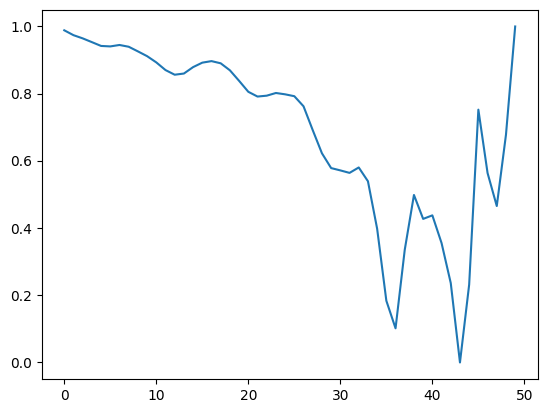

In [81]:
testdf = df_global[df_global["Country"] == "United Kingdom"]

rs = []

for i in range(1,len(testdf)-1):
    s1 = testdf["Gross Domestic Product (GDP)"].iloc[:-i].values
    s2 = testdf["Gross Domestic Product (GDP)"].iloc[i:].values
    rs.append(pearsonr(s1, s2).statistic)

plt.plot(rs)

In [70]:
testdf["Gross Domestic Product (GDP)"].autocorr()

np.float64(0.9879897223889952)

In [ ]:
can do autocorr against every country using groupby -- show graph, trend, error bars